<a href="https://colab.research.google.com/github/chiranjeevibmse/imdb_ml_assignment/blob/main/parta.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd


In [13]:
df_title_basics  = pd.read_csv('title.basics.tsv', delimiter='\t')
print(df_title_basics.head())
print(df_title_basics.shape)
print(df_title_basics.columns)
print(df_title_basics.describe())

      tconst titleType            primaryTitle           originalTitle  \
0  tt0000001     short              Carmencita              Carmencita   
1  tt0000002     short  Le clown et ses chiens  Le clown et ses chiens   
2  tt0000003     short          Pauvre Pierrot          Pauvre Pierrot   
3  tt0000004     short             Un bon bock             Un bon bock   
4  tt0000005     short        Blacksmith Scene        Blacksmith Scene   

   isAdult startYear endYear runtimeMinutes                    genres  
0      0.0      1894      \N              1         Documentary,Short  
1      0.0      1892      \N              5           Animation,Short  
2      0.0      1892      \N              4  Animation,Comedy,Romance  
3      0.0      1892      \N             12           Animation,Short  
4      0.0      1893      \N              1              Comedy,Short  
(1031408, 9)
Index(['tconst', 'titleType', 'primaryTitle', 'originalTitle', 'isAdult',
       'startYear', 'endYear', 'runt

In [14]:
df_name_basics = pd.read_csv('name.basics.tsv', delimiter='\t')
print(df_name_basics.head())
print(df_name_basics.shape)
print(df_name_basics.columns)
print(df_name_basics.describe())

      nconst      primaryName birthYear deathYear  \
0  nm0000001     Fred Astaire      1899      1987   
1  nm0000002    Lauren Bacall      1924      2014   
2  nm0000003  Brigitte Bardot      1934        \N   
3  nm0000004     John Belushi      1949      1982   
4  nm0000005   Ingmar Bergman      1918      2007   

                     primaryProfession  \
0       soundtrack,actor,miscellaneous   
1                   actress,soundtrack   
2  actress,soundtrack,music_department   
3              actor,soundtrack,writer   
4                writer,director,actor   

                            knownForTitles  
0  tt0031983,tt0072308,tt0053137,tt0050419  
1  tt0075213,tt0038355,tt0117057,tt0037382  
2  tt0054452,tt0049189,tt0057345,tt0056404  
3  tt0078723,tt0080455,tt0077975,tt0072562  
4  tt0083922,tt0069467,tt0050986,tt0050976  
(1164935, 6)
Index(['nconst', 'primaryName', 'birthYear', 'deathYear', 'primaryProfession',
       'knownForTitles'],
      dtype='object')
           nconst 

In [15]:
df_title_crew = pd.read_csv('title.crew.tsv', delimiter='\t')
print(df_title_crew.head())
print(df_title_crew.shape)
print(df_title_crew.columns)
print(df_title_crew.describe())

      tconst  directors writers
0  tt0000001  nm0005690      \N
1  tt0000002  nm0721526      \N
2  tt0000003  nm0721526      \N
3  tt0000004  nm0721526      \N
4  tt0000005  nm0005690      \N
(2375810, 3)
Index(['tconst', 'directors', 'writers'], dtype='object')
           tconst directors  writers
count     2375810   2375810  2375810
unique    2375810    290160   479943
top     tt0000001        \N       \N
freq            1    769320   945709


In [16]:
df_title_episode = pd.read_csv('title.episode.tsv', delimiter='\t')
print(df_title_episode.head())
print(df_title_episode.shape)
print(df_title_episode.columns)
print(df_title_episode.describe())

      tconst parentTconst seasonNumber episodeNumber
0  tt0041951    tt0041038            1             9
1  tt0042816    tt0989125            1            17
2  tt0042889    tt0989125           \N            \N
3  tt0043426    tt0040051            3            42
4  tt0043631    tt0989125            2            16
(3293072, 4)
Index(['tconst', 'parentTconst', 'seasonNumber', 'episodeNumber'], dtype='object')
           tconst parentTconst seasonNumber episodeNumber
count     3293072      3293072      3293071       3293071
unique    3293072        93003          227         15368
top     tt0041951   tt12164062            1            \N
freq            1        16839      1644745        665469


In [17]:
df_title_ratings = pd.read_csv('title.ratings.tsv', delimiter='\t')
print(df_title_ratings.head())
print(df_title_ratings.shape)
print(df_title_ratings.columns)
print(df_title_ratings.describe())

      tconst  averageRating  numVotes
0  tt0000001            5.7      1989
1  tt0000002            5.8       265
2  tt0000003            6.5      1850
3  tt0000004            5.5       178
4  tt0000005            6.2      2634
(1332958, 3)
Index(['tconst', 'averageRating', 'numVotes'], dtype='object')
       averageRating      numVotes
count   1.332958e+06  1.332958e+06
mean    6.956402e+00  1.039155e+03
std     1.381897e+00  1.750329e+04
min     1.000000e+00  5.000000e+00
25%     6.200000e+00  1.100000e+01
50%     7.200000e+00  2.600000e+01
75%     7.900000e+00  1.010000e+02
max     1.000000e+01  2.771239e+06


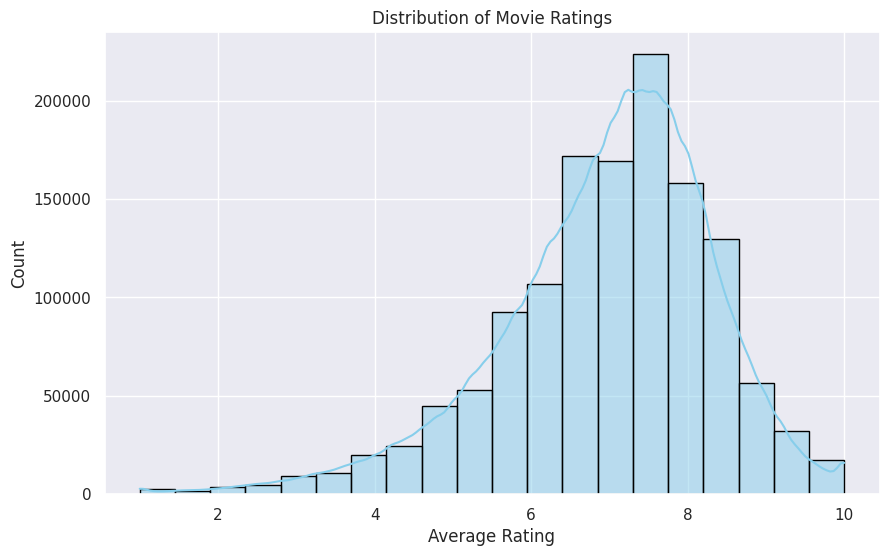

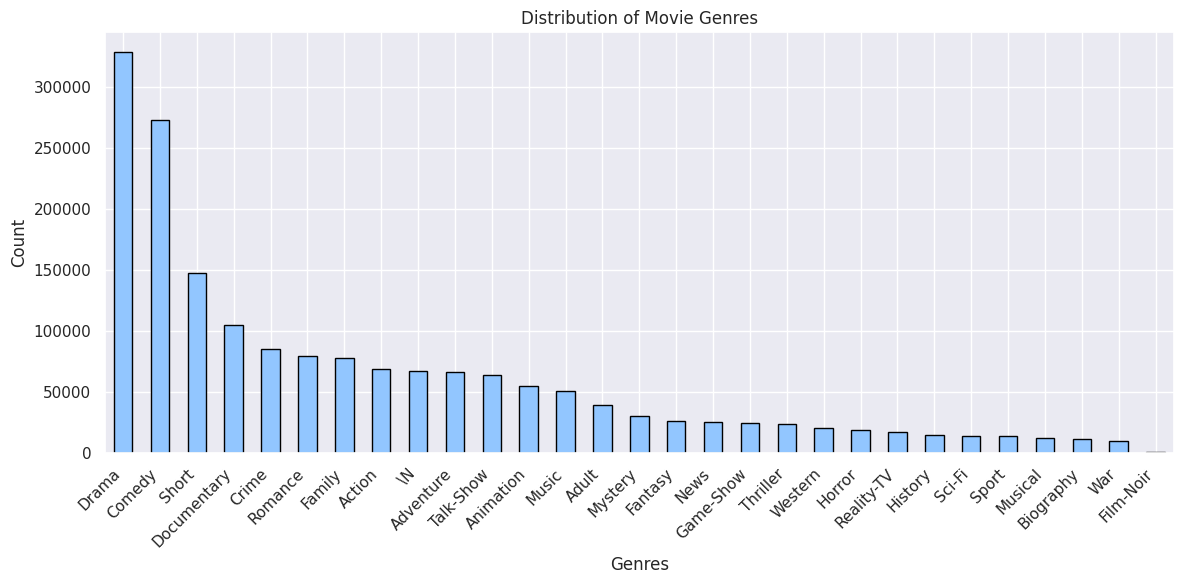

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
sns.histplot(df_title_ratings['averageRating'], bins=20, kde=True, color='skyblue', edgecolor='black')
plt.xlabel('Average Rating')
plt.ylabel('Count')
plt.title('Distribution of Movie Ratings')
plt.grid(True)
plt.show()

genre_counts = df_title_basics['genres'].str.split(',').explode().value_counts()

# Plotting the histogram for movie genres
plt.figure(figsize=(12, 6))
genre_counts.plot(kind='bar', edgecolor='black')
plt.xlabel('Genres')
plt.ylabel('Count')
plt.title('Distribution of Movie Genres')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()